In [159]:
import yfinance as yf
stocks = [
    "MSFT",   # Microsoft Corporation
    "GOOGL",  # Alphabet Inc. (Class A)
    "META",   # Meta Platforms Inc.
    "TSLA",   # Tesla Inc.
    "ORCL",   # Oracle
    "NFLX",   # Netflix
    "AMZN",   # Amazon.com Inc.
    
]

import numpy as np


# Our Total Portfolio consists of these 7 stock: MSFT, GOOGL, META, ORCL, TSLA, NFLX, AMZN

In [160]:
data = yf.download(stocks, start= "2020-01-01", end= "2025-07-02", auto_adjust= True) #YYYY-MM-DD
# auto_adjust = True automatically adjusts historical stock prices for splits and dividends. 
# This ensures that the price data reflects the true performance of the stock over time.

[*********************100%***********************]  7 of 7 completed


In [161]:
print(data.shape)
print(data.head())

(1381, 35)
Price           Close                                                 \
Ticker           AMZN      GOOGL        META        MSFT        NFLX   
Date                                                                   
2020-01-02  94.900497  68.026024  208.635391  153.042313  329.809998   
2020-01-03  93.748497  67.670158  207.531479  151.136673  325.899994   
2020-01-06  95.143997  69.473846  211.440048  151.527313  335.829987   
2020-01-07  95.343002  69.339645  211.897522  150.145721  330.750000   
2020-01-08  94.598503  69.833191  214.045731  152.537308  339.260010   

Price                                  High                         ...  \
Ticker           ORCL       TSLA       AMZN      GOOGL        META  ...   
Date                                                                ...   
2020-01-02  49.642693  28.684000  94.900497  68.026024  208.645331  ...   
2020-01-03  49.467850  29.534000  94.309998  68.278016  209.252036  ...   
2020-01-06  49.725510  30.102667  95.

In [162]:
print(data['Close'].info())
data['Close'].isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1381 entries, 2020-01-02 to 2025-07-01
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AMZN    1381 non-null   float64
 1   GOOGL   1381 non-null   float64
 2   META    1381 non-null   float64
 3   MSFT    1381 non-null   float64
 4   NFLX    1381 non-null   float64
 5   ORCL    1381 non-null   float64
 6   TSLA    1381 non-null   float64
dtypes: float64(7)
memory usage: 86.3 KB
None


Ticker
AMZN     0
GOOGL    0
META     0
MSFT     0
NFLX     0
ORCL     0
TSLA     0
dtype: int64

In [163]:
close = data['Close']
close

Ticker,AMZN,GOOGL,META,MSFT,NFLX,ORCL,TSLA
Date,,,,,,,
2020-01-02,94.900497,68.026024,208.635391,153.042313,329.809998,49.642693,28.684000
2020-01-03,93.748497,67.670158,207.531479,151.136673,325.899994,49.467850,29.534000
2020-01-06,95.143997,69.473846,211.440048,151.527313,335.829987,49.725510,30.102667
2020-01-07,95.343002,69.339645,211.897522,150.145721,330.750000,49.835915,31.270666
2020-01-08,94.598503,69.833191,214.045731,152.537308,339.260010,50.030025,32.809334
...,...,...,...,...,...,...,...
2025-06-25,211.990005,170.679993,708.679993,492.269989,1275.250000,210.720001,327.549988
2025-06-26,217.119995,173.539993,726.090027,497.450012,1306.670044,212.820007,325.779999
2025-06-27,223.300003,178.529999,733.630005,495.940002,1323.119995,210.240005,323.630005


# **Portfolio Optimization via Monte Carlo Simulation**

In [164]:
returns = close.pct_change(fill_method=None).dropna()
returns # in rates

Ticker,AMZN,GOOGL,META,MSFT,NFLX,ORCL,TSLA
Date,,,,,,,
2020-01-03,-0.012139,-0.005231,-0.005291,-0.012452,-0.011855,-0.003522,0.029633
2020-01-06,0.014886,0.026654,0.018834,0.002585,0.030469,0.005209,0.019255
2020-01-07,0.002092,-0.001932,0.002164,-0.009118,-0.015127,0.002220,0.038801
2020-01-08,-0.007809,0.007118,0.010138,0.015928,0.025729,0.003895,0.049205
2020-01-09,0.004799,0.010498,0.014311,0.012493,-0.010611,0.004618,-0.021945
...,...,...,...,...,...,...,...
2025-06-25,-0.003666,0.023445,-0.004942,0.004407,-0.003018,-0.021136,-0.037948
2025-06-26,0.024199,0.016757,0.024567,0.010523,0.024638,0.009966,-0.005404
2025-06-27,0.028464,0.028754,0.010384,-0.003036,0.012589,-0.012123,-0.006600


# Generating Random Weights for the portfolio
 $ Constraint: \sum_{i=1}^{N} w_{i} = 1 $

In [165]:
def gen_weights(data):
    w = np.random.random(data.shape[1])
    weights = w/sum(w)
    return weights

w = gen_weights(returns)
w

array([0.12846174, 0.24298279, 0.28840156, 0.00819341, 0.08258126,
       0.1266425 , 0.12273674])

# Calculate Expected Returns (Annualized) for the Porfolio
        
$$ E(R_{p}) = \sum_{i=1}^{N} w_{i} R_{i} $$


In [166]:
def portfolio_returns(data,weights):
    return np.sum(data.mean()*252*weights)

portfolio_returns(returns,w)

0.3321991056377619

# Visualising the Covariance (Annualized) Matrix

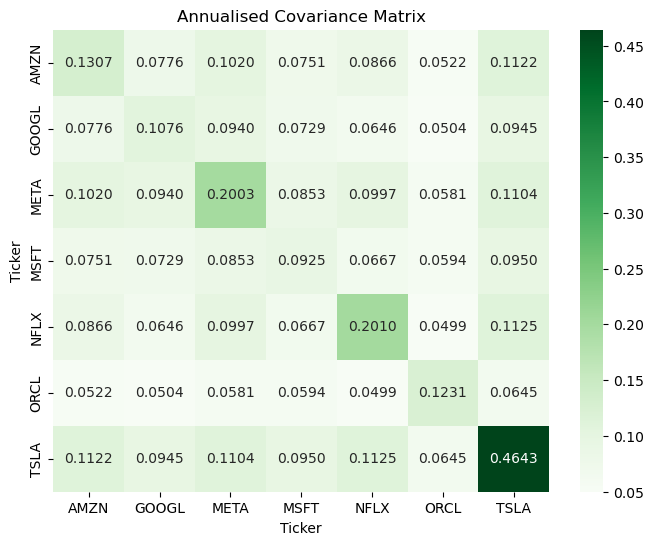

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

annualized_cov = returns.cov()*252

plt.figure(figsize=(8,6))
sns.heatmap(annualized_cov,annot=True,cmap='Greens', fmt='.4f')
plt.title("Annualised Covariance Matrix")
plt.show()

# Calculate Standard Deviation of Portolio Returns
$$ \sigma_p^2 = \sqrt{\mathbf{w}^\top \boldsymbol{\Sigma} \, \mathbf{w}} $$ 
where $ \boldsymbol{\Sigma} $ is the Covariance Matrix

In [168]:
def portfolio_std(annualized_cov,w):
    return np.sqrt(w.T @ annualized_cov @ w)

portfolio_std(annualized_cov,w)

0.3207586890908987

# Running the Monte Carlo Simulation and Plotting

In [169]:
MC_returns = []
MC_std = []
MC_weights = []
for sim in range(6000):
    w = gen_weights(returns)
    MC_weights.append(w)
    MC_returns.append(portfolio_returns(returns,w))
    MC_std.append(portfolio_std(annualized_cov,w))


In [170]:
risk_free_rate = 0.05
MC_sharpe_ratios = (np.array(MC_returns) - (np.ones(len(MC_returns)) * risk_free_rate))/np.array(MC_std)

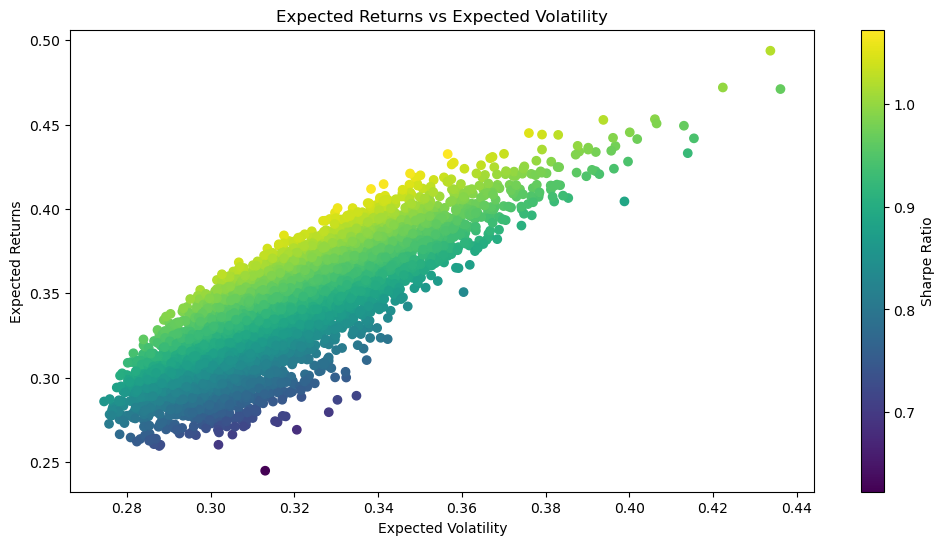

In [171]:
fig, ax = plt.subplots(figsize=(12,6))
scatter = ax.scatter(x = MC_std,y = MC_returns, c = MC_sharpe_ratios)
ax.set_ylabel('Expected Returns')
ax.set_xlabel('Expected Volatility')
ax.set_title('Expected Returns vs Expected Volatility')
cbar = plt.colorbar(scatter, ax= ax, label="Sharpe Ratio")


In [172]:
def max_sharpe_ratio_portfolio(MC_weights,MC_sharpe_ratios):
    return MC_weights[np.argmax(MC_sharpe_ratios)]

max_sharpe_ratio_portfolio(MC_weights,MC_sharpe_ratios)

array([0.0335657 , 0.01690043, 0.05682822, 0.04085696, 0.21708945,
       0.31625257, 0.31850665])

In [173]:
def min_variance_portfolio(MC_weights,MC_std):
    return MC_weights[np.argmin(MC_std)]

min_variance_portfolio(MC_weights,MC_std)

array([0.06055509, 0.2413164 , 0.00346144, 0.25539965, 0.15761524,
       0.27832627, 0.00332591])

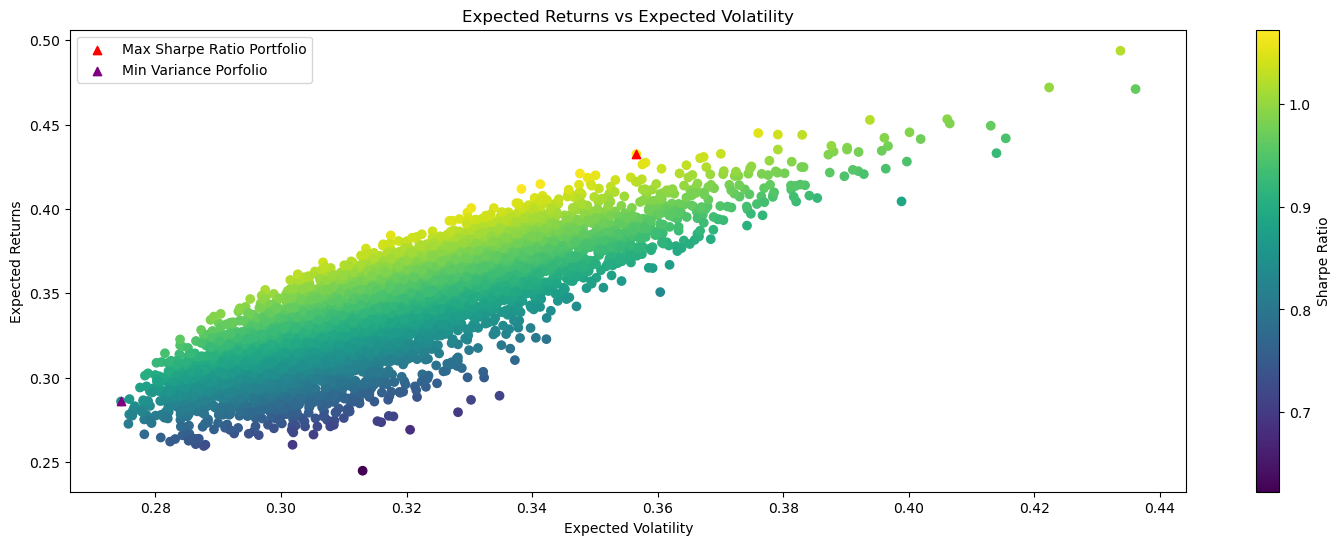

In [174]:
max_sharpe_ratio_idx = np.argmax(MC_sharpe_ratios)
min_variance_idx = np.argmin(MC_std)

fig, ax = plt.subplots(figsize=(18,6))
scatter = ax.scatter(x = MC_std,y = MC_returns, c = MC_sharpe_ratios)
ax.set_ylabel('Expected Returns')
ax.set_xlabel('Expected Volatility')
ax.set_title('Expected Returns vs Expected Volatility')
cbar = plt.colorbar(scatter, ax= ax, label="Sharpe Ratio")

ax.scatter(MC_std[max_sharpe_ratio_idx],MC_returns[max_sharpe_ratio_idx], label = 'Max Sharpe Ratio Portfolio',c = 'red',zorder = 5,marker = '^')
ax.scatter(MC_std[min_variance_idx],MC_returns[min_variance_idx], label = 'Min Variance Porfolio',c = 'purple',zorder = 5,marker = '^')

ax.legend()
